# Building Logistic Regression Algorithm From Scratch

In [465]:
## Making my own Dataset using make_classification function (binary Class Classification Dataset)

from sklearn.datasets import make_classification
X , y = make_classification(n_samples = 100 , n_features = 2 , n_classes = 2 , n_clusters_per_class=1 , n_informative = 1 , n_redundant = 0 ,
                           random_state = 41 ,class_sep = 30 , hypercube= False)

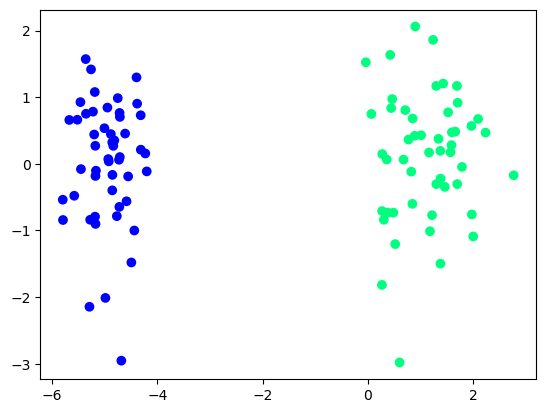

In [430]:
## Plotting scatter plot (1st column vs 2nd column) with respect to y values 

import matplotlib.pyplot as plt
plt.scatter(x = X[:,0] , y = X[:,1] , c = y , cmap = 'winter') ## from matplotlib

## Perceptron Trick for Building Algorithm for Logistic Regression 

In [431]:
## perceptron trick (Activation function as Step Function and Having no concept of Loss function) Algorithm 

import numpy as np
def Perceptron(X , y):
    
    X = np.insert(X , 0 , 1 , axis = 1)
    w = np.ones(X.shape[1])
    lr = 0.1
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j] , w))
        w = w + lr * (y[j] - y_hat) * X[j]
    
    return w[0] , w[1:]

In [432]:
## this is the step function 

def step(z):
    return 1 if z > 0 else 0

In [433]:
## getting intercept and slope term 

intercept_ , coef_ = Perceptron(X,y)

In [434]:
intercept_

1.3000000000000003

In [435]:
coef_

array([1.1134548 , 0.33857969])

In [436]:
m = -(coef_[0] / coef_[1])
c = -(intercept_ / coef_[1])

In [437]:
m

-3.2886048105173025

In [438]:
c

-3.8395687654294357

In [439]:
x_input = np.linspace(-3,2,100)
y_input = m*x_input + c

(-3.0, 2.0)

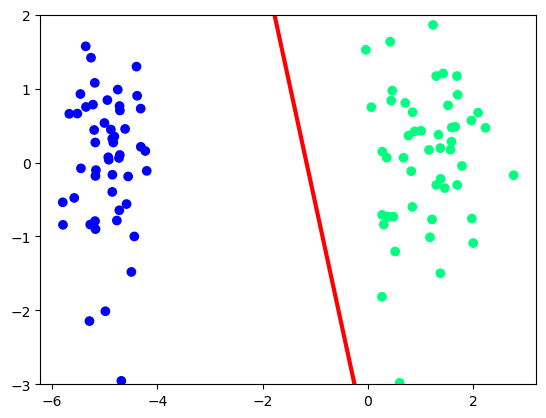

In [440]:
plt.plot(x_input , y_input, color = 'r' , linewidth = 3)
plt.scatter(x = X[:,0] , y = X[:,1] , c = y , cmap = 'winter') ## from matplotlib
plt.ylim(-3,2)

## Logistic Regression Algorithm by Sklearn

In [453]:
from sklearn.linear_model import LogisticRegression

In [454]:
clf = LogisticRegression()

In [455]:
clf.fit(X,y)

LogisticRegression()

In [456]:
intercept_1 = clf.intercept_

In [457]:
intercept_1

array([3.54861952])

In [458]:
coef_1 = clf.coef_

In [459]:
coef_1

array([[1.77298737, 0.0122258 ]])

In [460]:
m1 = -(coef_1[0][0] / coef_1[0][1])
c1 = -(intercept_1 / coef_1[0][1])

In [461]:
m1

-145.02017426842573

In [462]:
c1

array([-290.25667677])

In [463]:
x_input1 = np.linspace(-3,2,100)
y_input1 = m1*x_input1 + c1

## Comparison between Our Algorithm with Logistic Regression 

(-3.0, 2.0)

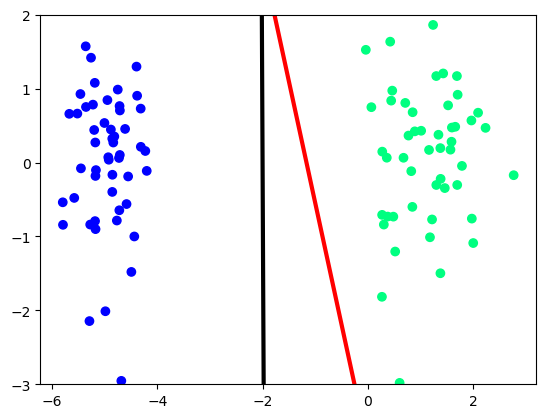

In [464]:
plt.plot(x_input1 , y_input1, color = 'black' , linewidth = 3)
plt.plot(x_input , y_input , color = 'r' , linewidth = 3)
plt.scatter(x = X[:,0] , y = X[:,1] , c = y , cmap = 'winter') ## from matplotlib
plt.ylim(-3,2)

### Conclusion 

But our Algorithm have some Flaw , Flaw is that we are neglecting correctly classified points for that we have to consider correctly classified points 

Concept of Updated Algorithm ,  

    --- for correctly classified points -> Push line to make line in equilibrim (symmetric) state 

    --- for misclassified points -> Pull line to make points correctly classified